In [1]:
# Install the Prophet
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Set crypto variable
crypto = 'SOL'

# Create crypto df
crypto_df = f'{crypto}_df'.lower()

In [5]:
# Store the crypto data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
crypto_df = pd.read_csv(
    f'~/crypto-forecast/Resources/{crypto}-USD.csv',
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
crypto_df = crypto_df.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(crypto_df.head())
display(crypto_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-14,147.28,148.83,141.91,142.03,142.03,2586166419
2024-05-15,142.03,158.64,141.35,158.19,158.19,3585715674
2024-05-16,158.19,164.32,156.77,159.12,159.12,3498272951
2024-05-17,159.12,171.61,159.12,169.53,169.53,3371355809
2024-05-18,169.52,175.69,169.00,172.28,172.28,2497896192


In [6]:
# Get last closing price
last_close_df = crypto_df.iloc[-1]
last_close_price = last_close_df['Close']
last_close_price

172.28

In [7]:
crypto_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998633,0.998193,0.997094,0.997094,0.725953
High,0.998633,1.000000,0.997878,0.998870,0.998870,0.741824
Low,0.998193,0.997878,1.000000,0.998371,0.998371,0.711526
Close,0.997094,0.998870,0.998371,1.000000,1.000000,0.730904
Adj Close,0.997094,0.998870,0.998371,1.000000,1.000000,0.730904
Volume,0.725953,0.741824,0.711526,0.730904,0.730904,1.000000


In [8]:
# Create new df with just Close prices and Volume
df_close = crypto_df[['Close', 'Volume']]

In [9]:
df_close.name = 'Close'
df_close

,Close,Volume
Date,,
2020-04-10,0.951054,87364276
2020-04-11,0.776819,43862444
2020-04-12,0.882507,38736897
2020-04-13,0.777832,18211285
2020-04-14,0.661925,16747614
...,...,...
2024-05-14,142.030000,2586166419
2024-05-15,158.190000,3585715674
2024-05-16,159.120000,3498272951


In [10]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_close_ma = df_close.copy()

# Calculate 10-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA10'] = df_close_ma['Close'].rolling(10).mean()

# Calculate 30-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA30'] = df_close_ma['Close'].rolling(30).mean()

# Calculate 50-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA50'] = df_close_ma['Close'].rolling(50).mean()

# Remove NULL values
df_close_ma.dropna(inplace=True)

In [11]:
# Review the first and last five rows of the DataFrame
display(df_close_ma.head())
display(df_close_ma.tail())

,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2020-05-29,0.579415,2066857,0.590875,0.607929,0.638247
2020-05-30,0.587933,2449095,0.591753,0.604491,0.630985
2020-05-31,0.570022,1892967,0.587863,0.599199,0.626849
2020-06-01,0.577495,2159877,0.581725,0.594586,0.620749
2020-06-02,0.564669,1295757,0.576889,0.590758,0.616485


,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2024-05-14,142.03,2586166419,146.615449,143.567451,157.653637
2024-05-15,158.19,3585715674,147.863146,144.223497,157.003440
2024-05-16,159.12,3498272951,148.494906,144.984853,156.458611
2024-05-17,169.53,3371355809,150.634474,146.240314,156.056778
2024-05-18,172.28,2497896192,153.633000,147.246900,155.657819


<Axes: xlabel='Date'>

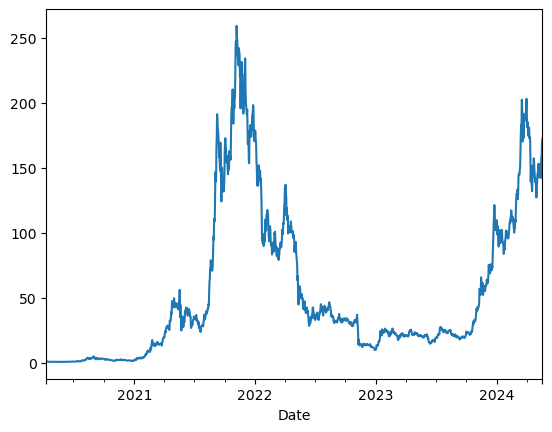

In [12]:
# Plot Close
df_close['Close'].plot()

In [13]:
## Create a Time Series Model with Prophet

In [14]:
# Using the DataFrame, reset the index so the date information is no longer the index
df_close = df_close.reset_index()

In [15]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_close.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_close.dropna()

# View the first and last five rows of the DataFrame
df_close

,ds,y,Volume
0,2020-04-10,0.951054,87364276
1,2020-04-11,0.776819,43862444
2,2020-04-12,0.882507,38736897
3,2020-04-13,0.777832,18211285
4,2020-04-14,0.661925,16747614
...,...,...,...
1495,2024-05-14,142.030000,2586166419
1496,2024-05-15,158.190000,3585715674
1497,2024-05-16,159.120000,3498272951
1498,2024-05-17,169.530000,3371355809


In [16]:
# Call the Prophet function, store as an object
crypto_model = Prophet()

In [17]:
# Fit the time-series model.
crypto_model.fit(df_close)

18:50:57 - cmdstanpy - INFO - Chain [1] start processing
18:50:57 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out 30 days
crypto_future = crypto_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the DataFrame
crypto_future.tail(5)

,ds
1585,2024-08-12
1586,2024-08-13
1587,2024-08-14
1588,2024-08-15
1589,2024-08-16


In [19]:
# Make the predictions for the data using the DataFrame
crypto_forecast = crypto_model.predict(crypto_future)

# Display the first five rows of the DataFrame
crypto_forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1560,2024-07-18,190.996062,167.216777,209.616942,180.488470,200.358297,-2.266207,-2.266207,-2.266207,0.130492,0.130492,0.130492,-2.396699,-2.396699,-2.396699,0.0,0.0,0.0,188.729854
1561,2024-07-19,191.499071,166.462510,210.423346,180.803970,201.210340,-2.644677,-2.644677,-2.644677,-0.190274,-0.190274,-0.190274,-2.454403,-2.454403,-2.454403,0.0,0.0,0.0,188.854394
1562,2024-07-20,192.002081,166.633979,211.174399,181.061793,202.038419,-2.358462,-2.358462,-2.358462,0.169044,0.169044,0.169044,-2.527507,-2.527507,-2.527507,0.0,0.0,0.0,189.643619
1563,2024-07-21,192.505091,166.985905,212.210409,181.287758,202.866498,-2.324061,-2.324061,-2.324061,0.294130,0.294130,0.294130,-2.618191,-2.618191,-2.618191,0.0,0.0,0.0,190.181030
1564,2024-07-22,193.008101,167.366681,211.990139,181.507253,203.693602,-2.718687,-2.718687,-2.718687,0.009624,0.009624,0.009624,-2.728310,-2.728310,-2.728310,0.0,0.0,0.0,190.289414
1565,2024-07-23,193.511111,167.310594,212.952235,181.568164,204.522656,-3.368197,-3.368197,-3.368197,-0.508869,-0.508869,-0.508869,-2.859327,-2.859327,-2.859327,0.0,0.0,0.0,190.142914
1566,2024-07-24,194.014121,167.487555,214.500450,181.821778,205.342535,-2.916407,-2.916407,-2.916407,0.095853,0.095853,0.095853,-3.012260,-3.012260,-3.012260,0.0,0.0,0.0,191.097714
1567,2024-07-25,194.517131,168.435986,213.279680,182.076808,206.183321,-3.057137,-3.057137,-3.057137,0.130492,0.130492,0.130492,-3.187629,-3.187629,-3.187629,0.0,0.0,0.0,191.459993
1568,2024-07-26,195.020141,168.129420,211.652459,182.400427,206.920364,-3.575695,-3.575695,-3.575695,-0.190274,-0.190274,-0.190274,-3.385421,-3.385421,-3.385421,0.0,0.0,0.0,191.444446
1569,2024-07-27,195.523150,168.404766,214.172719,182.574482,207.872569,-3.436009,-3.436009,-3.436009,0.169044,0.169044,0.169044,-3.605053,-3.605053,-3.605053,0.0,0.0,0.0,192.087142


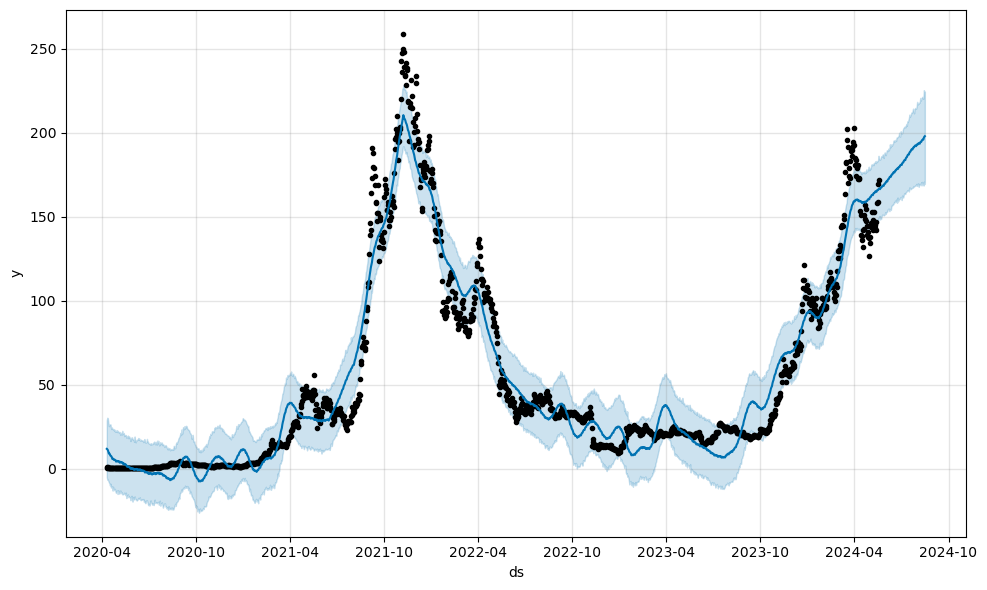

In [20]:
# Plot the Prophet predictions for the data
fig1 = crypto_model.plot(crypto_forecast)

In [21]:
# Set the index in the forecast DataFrame to the ds datetime column
crypto_forecast = crypto_forecast.set_index('ds')

In [22]:
# View only the yhat,yhat_lower and yhat_upper columns from the forecast DataFrame
crypto_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-05-19,166.899572,148.681928,184.750659
2024-05-20,166.842537,150.611882,184.162201
2024-05-21,166.556896,148.449651,184.142360
2024-05-22,167.402052,149.098101,184.808526
2024-05-23,167.686689,148.798586,186.074609
...,...,...,...
2024-08-12,196.042970,169.982496,220.923509
2024-08-13,195.997548,168.805555,220.314986
2024-08-14,197.129582,168.754040,225.497265


In [23]:
# Rename columns
crypto_forecast.rename(columns={'yhat':'mid trend price','yhat_lower':'lower trend price','yhat_upper':'upper trend price'}, inplace=True)

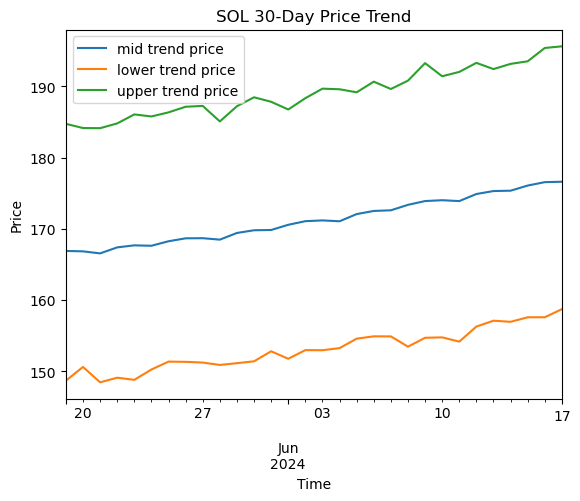

In [24]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-60,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 30-Day Price Trend')    
plt.show()

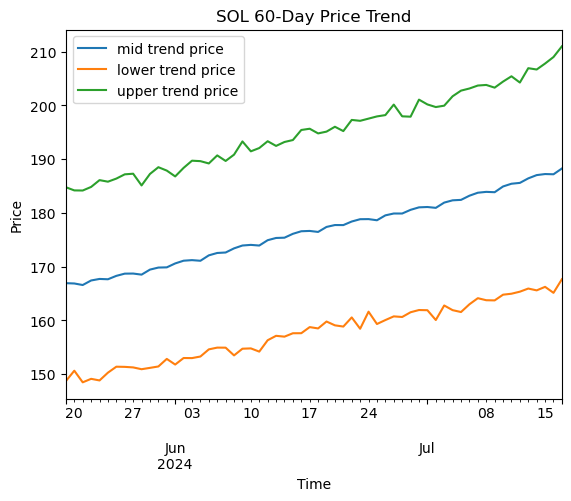

In [25]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-30,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 60-Day Price Trend')    
plt.show()

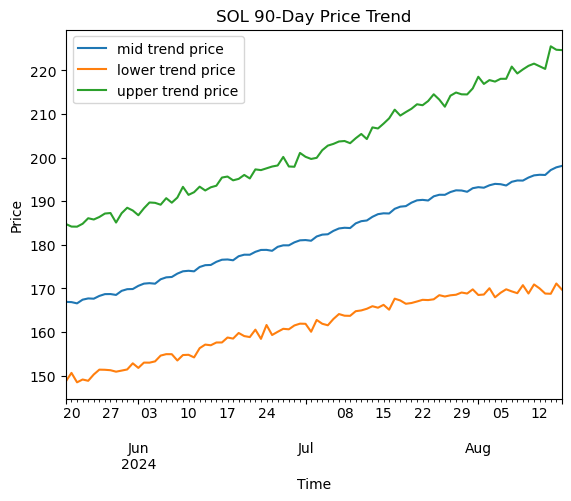

In [26]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 90-Day Price Trend')    
plt.show()

In [27]:
# Retrieve last closing price
last_close_price

172.28

In [28]:
# Retreive tomorrow's mid trend price forecast
tommorow_mid_trend_price = crypto_forecast['mid trend price'].iloc[-90]
tommorow_mid_trend_price

166.8995717049648

In [29]:
# Retrieve mid trend price in 30 days
mid_trend_price_in_30 = crypto_forecast['mid trend price'].iloc[-60]
mid_trend_price_in_30

176.43502572192716

In [30]:
# Retrieve mid trend price in 60 days
mid_trend_price_in_60 = crypto_forecast['mid trend price'].iloc[-30]
mid_trend_price_in_60

188.72985434585053

In [31]:
# Retrieve mid trend price in 90 days
mid_trend_price_in_90 = crypto_forecast['mid trend price'].iloc[-1]
mid_trend_price_in_90

198.07181035182143

In [32]:
# Calculate expected gain/loss between mid trend price in 30 days and last close price
percent_diff_30 = ((mid_trend_price_in_30)/(last_close_price))-1
percent_diff_30.round(3)

0.024

In [33]:
# Calculate expected gain/loss between mid trend price in 60 days and last close price
percent_diff_60 = ((mid_trend_price_in_60)/(last_close_price))-1
percent_diff_60.round(3)

0.095

In [34]:
# Calculate expected gain/loss between mid trend price in 90 days and last close price
percent_diff_90 = ((mid_trend_price_in_90)/(last_close_price))-1
percent_diff_90.round(3)

0.15

In [35]:
# Reset the index in the forecast DataFrame
crypto_forecast = crypto_forecast.reset_index()

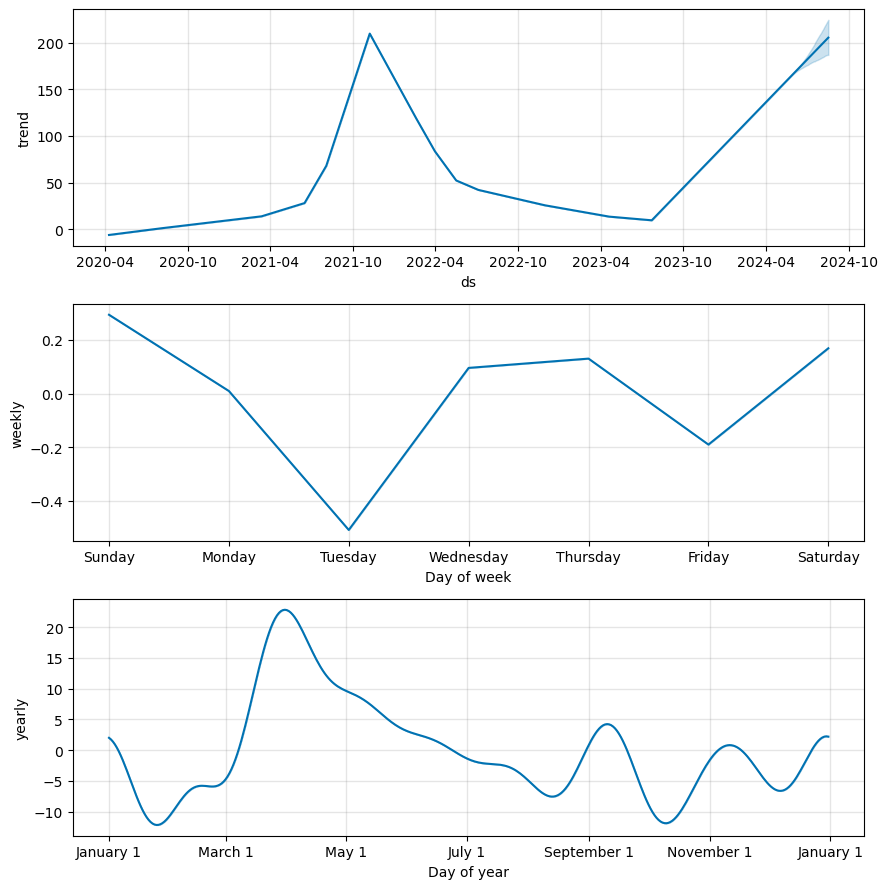

In [36]:
# Use the plot_components function to visualize the forecast results
# for the forecast DataFrame
fig2 = crypto_model.plot_components(crypto_forecast)

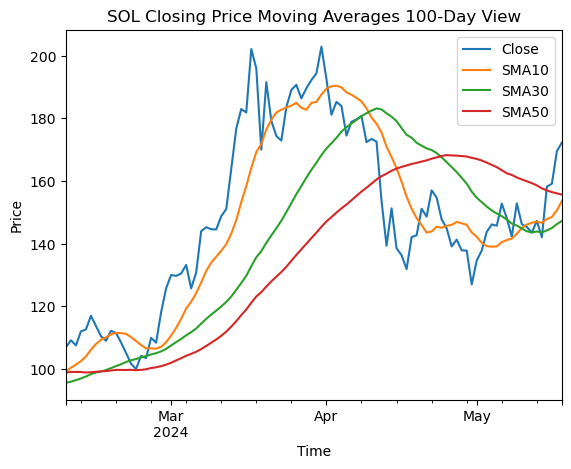

In [37]:
df_last_100 = df_close_ma.iloc[-100:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 100-Day View')    
plt.show()

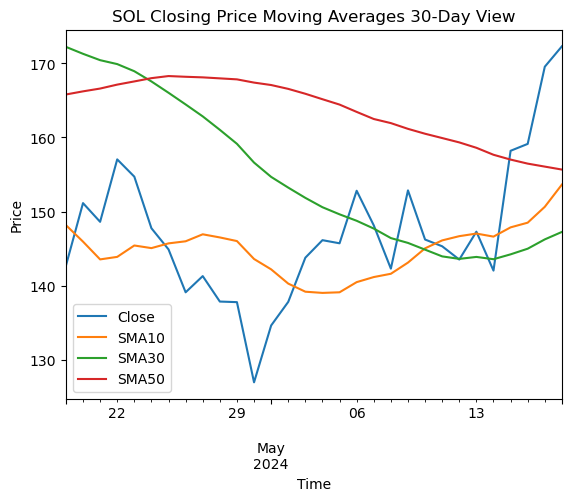

In [38]:
df_last_100 = df_close_ma.iloc[-30:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 30-Day View')    
plt.show()

In [39]:
# import module
from datetime import datetime
 
# get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d")
print("Current date & time : ", current_datetime)
 
# convert datetime obj to string
str_current_datetime = str(current_datetime)
 
# create a file object along with extension
#file_name = f'{crypto} '+str_current_datetime+".txt"
file_name = str_current_datetime+".csv"
file = open(file_name, 'a')
 
print("File created : ", file.name)
file.close()

Current date & time :  2024-05-19
File created :  2024-05-19.csv


In [40]:
f = open(f'{file_name}', "a")
f.writelines([f'{crypto},{last_close_price},{percent_diff_30},{percent_diff_60},{percent_diff_90}\n'])
f.close()

In [41]:
f = open(f'{file_name}', "r")
print(f.read())

ADA,0.481067,-0.006935356560101691,-0.07859463805561773,0.23472349758660838
BNB,580.305542,-0.34535988531321604,-0.3403273855834782,-0.29106901029282883
BONK,2.8e-05,0.1292127878224536,0.2630430622648412,0.38814028120395916
BTC,67051.88,-0.23323891802030206,-0.21230307524907965,-0.17587733204204037
DOGE,0.152578,-0.2473798803862568,-0.3174264585592441,-0.169114542247355
ETH,3094.12,-0.05599603182651869,-0.04100077989984452,0.04719570091164238
PEPE,1e-05,0.1936552667556517,0.4219240250195795,0.6253332092778225
SHIB,2.5e-05,-0.19473091361435269,-0.14662759930253433,-0.08482022409859769
SOL,172.28,0.024117864650146092,0.09548325020809445,0.1497086739715663

